In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import RocCurveDisplay
from sklearn import preprocessing
from tensorflow import keras


In [65]:
ml_df = pd.read_csv(
    "../Dataset/for training/4_feat_wo_fill.csv")
ml_df.drop(["Unnamed: 0"], axis=1, inplace=True)
ml_df['Id'] = ['condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'condition', 'control', 'control',
            'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control', 'control']        
ml_df

,gender,age,5days_sleep_time_activity,5days_day_time_activity,Id
0,2,37,10693.6,228824.0,condition
1,2,42,48771.2,239278.2,condition
2,1,47,43211.0,317726.0,condition
3,2,27,56892.4,194298.2,condition
4,2,52,31303.8,200302.2,condition
5,1,37,26634.2,240767.8,condition
6,1,22,61643.6,335598.2,condition
7,2,27,34374.2,284320.6,condition
8,2,47,42992.0,203120.0,condition
9,2,47,25811.0,482765.0,condition


In [66]:
import math
from matplotlib.colors import ListedColormap

In [67]:
x = [] 
y = [] 
count  = 0
count_g = 0
count_o = 0

for i in range(len(ml_df["Id"])):
    
    if ml_df["Id"][i] == "condition":
        x.append([1])
        y.append([ml_df["5days_sleep_time_activity"][i],
                           ml_df["5days_day_time_activity"][i] ,ml_df["age"][i]])
                           
    
    elif ml_df["Id"][i] == "control":
        x.append([0])
        y.append([ml_df["5days_sleep_time_activity"][i],
                           ml_df["5days_day_time_activity"][i], ml_df["age"][i]])
    

    
print(f'Select: {len(y)} set')
y = np.array(y)
x = np.array(x)

print(y)
print(x)

Select: 55 set
[[1.069360e+04 2.288240e+05 3.700000e+01]
 [4.877120e+04 2.392782e+05 4.200000e+01]
 [4.321100e+04 3.177260e+05 4.700000e+01]
 [5.689240e+04 1.942982e+05 2.700000e+01]
 [3.130380e+04 2.003022e+05 5.200000e+01]
 [2.663420e+04 2.407678e+05 3.700000e+01]
 [6.164360e+04 3.355982e+05 2.200000e+01]
 [3.437420e+04 2.843206e+05 2.700000e+01]
 [4.299200e+04 2.031200e+05 4.700000e+01]
 [2.581100e+04 4.827650e+05 4.700000e+01]
 [5.014700e+04 1.534946e+05 4.700000e+01]
 [3.457660e+04 2.284204e+05 4.200000e+01]
 [6.233080e+04 2.916616e+05 3.700000e+01]
 [4.287800e+04 7.223740e+04 6.200000e+01]
 [4.201620e+04 1.643874e+05 5.700000e+01]
 [1.793880e+04 3.973210e+05 4.700000e+01]
 [2.434460e+04 8.583540e+04 5.200000e+01]
 [4.003840e+04 6.414200e+04 4.200000e+01]
 [1.701400e+04 1.897034e+05 5.200000e+01]
 [1.030180e+04 8.449680e+04 3.200000e+01]
 [4.627000e+03 9.156880e+04 3.700000e+01]
 [1.802360e+04 1.839744e+05 6.700000e+01]
 [2.958120e+04 2.358314e+05 3.200000e+01]
 [6.270340e+04 2.57

In [68]:
# Add noisy features
random_state = np.random.RandomState(0)


# Train Test split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)


In [69]:
print(x_train)
print(y_train)

[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]]
[[5.014700e+04 1.534946e+05 4.700000e+01]
 [1.032050e+05 4.311018e+05 2.700000e+01]
 [2.958120e+04 2.358314e+05 3.200000e+01]
 [1.914980e+04 1.691192e+05 3.200000e+01]
 [8.464720e+04 3.317996e+05 5.200000e+01]
 [6.471040e+04 3.732576e+05 4.700000e+01]
 [3.437420e+04 2.843206e+05 2.700000e+01]
 [4.201620e+04 1.643874e+05 5.700000e+01]
 [4.990480e+04 3.987230e+05 3.200000e+01]
 [2.829820e+04 2.468148e+05 5.200000e+01]
 [9.694840e+04 3.433882e+05 4.700000e+01]
 [1.701400e+04 1.897034e+05 5.200000e+01]
 [4.544220e+04 2.844162e+05 3.700000e+01]
 [3.082520e+04 2.279220e+05 6.200000e+01]
 [1.793880e+04 3.973210e+05 4.700000e+01]
 [2.663420e+04 2.407678e+05 3.700000e+01]
 [1.153294e+05 4.798070e+05 2.200000e+01]
 [2.434460e+04 8.583540e+04 5.200000e+01]
 [6.090320e+04 3.922320

In [70]:
def classifier_modeling():
    model = Sequential()
    model.add(Dense(50, input_shape=(3,), activation='relu'))
    model.add(Dense(60, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))  
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', metrics=['accuracy'])
    return model

In [71]:
#testing model
model = Sequential()
model.add(Dense(50, input_shape=(3,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

le = preprocessing.LabelEncoder()
le.fit(x_train)
x_train = le.transform(x_train)
x_train = keras.utils.to_categorical(x_train)

model.fit(y_train, x_train, validation_split=0.2, epochs=50, batch_size=2)


Epoch 1/50


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


18/18 [==============================] - 1s 9ms/step - loss: 3788.1790 - accuracy: 0.5429 - val_loss: 499.0038 - val_accuracy: 0.4444
Epoch 2/50
18/18 [==============================] - 0s 3ms/step - loss: 616.2891 - accuracy: 0.6000 - val_loss: 1811.9305 - val_accuracy: 0.4444
Epoch 3/50
18/18 [==============================] - 0s 3ms/step - loss: 1119.4645 - accuracy: 0.5429 - val_loss: 1195.4263 - val_accuracy: 0.4444
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 1338.1196 - accuracy: 0.6000 - val_loss: 850.9211 - val_accuracy: 0.4444
Epoch 5/50
18/18 [==============================] - 0s 3ms/step - loss: 774.0439 - accuracy: 0.5714 - val_loss: 747.4755 - val_accuracy: 0.4444
Epoch 6/50
18/18 [==============================] - 0s 3ms/step - loss: 833.5315 - accuracy: 0.5429 - val_loss: 907.5917 - val_accuracy: 0.4444
Epoch 7/50
18/18 [==============================] - 0s 3ms/step - loss: 1720.0619 - accuracy: 0.5714 - val_loss: 819.8159 - val_accuracy: 0.55

Automatically created module for IPython interactive environment
Epoch 1/30


C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14/14 [==============================] - 1s 13ms/step - loss: 5579.5278 - accuracy: 0.7143 - val_loss: 1208.0504 - val_accuracy: 1.0000
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 2066.9753 - accuracy: 0.3571 - val_loss: 4814.8608 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 1179.0275 - accuracy: 0.4643 - val_loss: 2692.7993 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 409.4551 - accuracy: 0.7500 - val_loss: 813.0605 - val_accuracy: 1.0000
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 467.9300 - accuracy: 0.6429 - val_loss: 17.4511 - val_accuracy: 0.8571
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 339.2691 - accuracy: 0.6429 - val_loss: 110.6478 - val_accuracy: 1.0000
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 542.9050 - accuracy: 0.6071 - val_loss: 997.2995 - val_accura

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14/14 [==============================] - 1s 12ms/step - loss: 7433.9150 - accuracy: 0.3571 - val_loss: 4935.3867 - val_accuracy: 0.1429
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 2747.2156 - accuracy: 0.3929 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 1048.7305 - accuracy: 0.4643 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
14/14 [==============================] - 0s 7ms/step - loss: 723.4833 - accuracy: 0.3929 - val_loss: 259.7494 - val_accuracy: 0.7143
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 391.3293 - accuracy: 0.6786 - val_loss: 2144.9658 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 0s 3ms/step - loss: 761.0187 - accuracy: 0.5357 - val_loss: 924.8049 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 697.9366 - accuracy: 0.4643 - val_loss: 83.2352 - val_acc

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14/14 [==============================] - 0s 12ms/step - loss: 3618.4028 - accuracy: 0.6429 - val_loss: 2089.5757 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 0s 4ms/step - loss: 937.8136 - accuracy: 0.5357 - val_loss: 3720.6587 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 0s 4ms/step - loss: 1547.6945 - accuracy: 0.3571 - val_loss: 5318.2485 - val_accuracy: 0.0000e+00
Epoch 4/30
14/14 [==============================] - 0s 4ms/step - loss: 1358.9932 - accuracy: 0.6786 - val_loss: 46.2213 - val_accuracy: 1.0000
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 860.7606 - accuracy: 0.4286 - val_loss: 464.9456 - val_accuracy: 0.8571
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 549.3444 - accuracy: 0.4643 - val_loss: 890.6398 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 421.2793 - accuracy: 0.6071 - val_loss: 0.0000e+00 - 

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14/14 [==============================] - 1s 12ms/step - loss: 10595.4922 - accuracy: 0.4286 - val_loss: 847.5470 - val_accuracy: 1.0000
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 2440.4402 - accuracy: 0.3571 - val_loss: 276.6407 - val_accuracy: 1.0000
Epoch 3/30
14/14 [==============================] - 0s 3ms/step - loss: 1590.5411 - accuracy: 0.3571 - val_loss: 289.3655 - val_accuracy: 1.0000
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 793.0518 - accuracy: 0.3571 - val_loss: 662.4178 - val_accuracy: 0.7143
Epoch 5/30
14/14 [==============================] - 0s 3ms/step - loss: 849.0727 - accuracy: 0.4643 - val_loss: 847.5102 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 667.3484 - accuracy: 0.6071 - val_loss: 320.7944 - val_accuracy: 1.0000
Epoch 7/30
14/14 [==============================] - 0s 4ms/step - loss: 1548.8976 - accuracy: 0.3929 - val_loss: 0.0000e+00 - val_accuracy

C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\safec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


14/14 [==============================] - 1s 13ms/step - loss: 5194.6343 - accuracy: 0.7500 - val_loss: 1657.6171 - val_accuracy: 0.0000e+00
Epoch 2/30
14/14 [==============================] - 0s 3ms/step - loss: 938.6935 - accuracy: 0.6071 - val_loss: 1332.0396 - val_accuracy: 0.0000e+00
Epoch 3/30
14/14 [==============================] - 0s 5ms/step - loss: 618.2366 - accuracy: 0.5714 - val_loss: 962.2015 - val_accuracy: 0.8750
Epoch 4/30
14/14 [==============================] - 0s 3ms/step - loss: 1110.2583 - accuracy: 0.6429 - val_loss: 1051.7334 - val_accuracy: 0.8750
Epoch 5/30
14/14 [==============================] - 0s 4ms/step - loss: 517.4325 - accuracy: 0.6071 - val_loss: 2294.0400 - val_accuracy: 0.0000e+00
Epoch 6/30
14/14 [==============================] - 0s 4ms/step - loss: 379.5946 - accuracy: 0.6786 - val_loss: 958.4049 - val_accuracy: 0.0000e+00
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 388.0392 - accuracy: 0.4286 - val_loss: 395.8544 - v

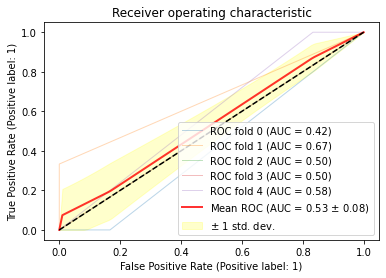

In [72]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
import pickle
import matplotlib.pyplot as plt
print(__doc__)


# Add noisy features
random_state = np.random.RandomState(0)

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=random_state)

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)

history = []

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

x_train = np.argmax(x_train, axis=1) 

for i, (train, val) in enumerate(cv.split(y_train, x_train)):

    X_train, X_val = y[train], y[val]
    y_train, y_val = x[train], x[val]

    le = preprocessing.LabelEncoder()
    le.fit(y_train)
    y_train = le.transform(y_train)
    y_train = keras.utils.to_categorical(y_train)

    
    classifier = classifier_modeling()

    # Fit model
    classifier.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=2)

    # Save model
    with open('model\\ann_wofill', 'wb') as f:
        pickle.dump(classifier, f)

    # Predict
    predict = classifier.predict(X_val)
    predict = np.argmax(predict, axis=1)

    viz = RocCurveDisplay.from_predictions(y_val, predict, name='ROC fold {}'.format(i),
                           alpha=0.3, lw=1, ax=ax)                     
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="r",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)


# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="yellow",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.plot([0, 1], [0, 1], 'k--')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic")
ax.legend(loc="lower right")
plt.savefig(
    'graph\\ann_wofill_graph.jpg')
plt.show()




In [73]:
# print(y_test)
# print(x_test)


[1 1 1 1 1 1 1 1 1 0 1]
[0 0 0 0 1 1 0 0 0 0 1]
              precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.30      1.00      0.46         3

    accuracy                           0.36        11
   macro avg       0.65      0.56      0.34        11
weighted avg       0.81      0.36      0.29        11

accuracy : 0.36363636363636365



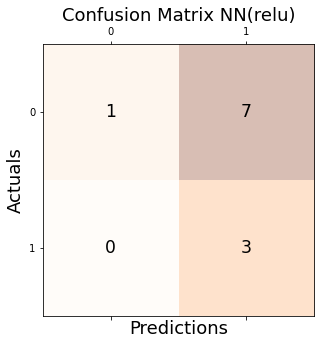

<Figure size 432x288 with 0 Axes>

In [74]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# Report
predict = classifier.predict(y_test)
predict = np.argmax(predict, axis=1)
x_test = x_test[:,0]

print(predict)
print(x_test)

print(classification_report(x_test, predict))

conf = confusion_matrix(x_test, predict)
print(f"accuracy : {accuracy_score(x_test, predict)}\n")

# Plot cofusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=j, y=i, s=conf[i, j], va='center',
                ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix NN(relu)', fontsize=18)
plt.show()
plt.savefig(
    'matrix\\ann_wofill_matrix.jpg')
